In [1]:
# Importing required Libraries
import numpy as np
import pandas as pd
import datetime as dt

# For PLotting we will use these library
import matplotlib.pyplot as plt
from itertools import cycle
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

These libraries are essential for the subsequent data processing, analysis, and visualization tasks in the code. They provide tools to work with numerical data, handle dates, and create various types of plots for exploratory data analysis.

**numpy (np):** Library for numerical operations, supporting large arrays and matrices with mathematical functions.

**pandas (pd):** Powerful data manipulation library, providing Series and DataFrame for efficient structured data handling.

**datetime (dt):** Module for working with dates and times, potentially used for date-related operations.

**matplotlib.pyplot (plt):** 2D plotting library for creating static, interactive, and animated visualizations. pyplot offers a convenient interface for plot creation.

**itertools.cycle:** Function returning an iterator cycling indefinitely through a sequence. Used to cycle through names for stock parameters in visualization.

**plotly.graph_objects (go):** Plotly library for interactive plots. graph_objects module creates various charts using the Graph Objects API.

**plotly.express (px):** High-level interface for easy and rapid plotting with a simple syntax, built on top of Plotly.

**plotly.subplots.make_subplots:** Function for creating subplots in a single figure, allowing arrangement of multiple plots in a grid.


In [2]:
# Reading the dataset

path = "BTC-USD.csv"
df = pd.read_csv(path)

# Understanding Data

In [3]:
print('Dataset Shape:', df.shape) #Prints the shape of the DataFrame, indicating the number of rows and columns.

Dataset Shape: (3288, 7)


In [4]:
df.head() #Displays the first few rows of the DataFrame to give a quick look at the dataset.

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-01,320.434998,320.434998,314.002991,314.248993,314.248993,8036550
1,2015-01-02,314.079010,315.838989,313.565002,315.032013,315.032013,7860650
2,2015-01-03,314.846008,315.149994,281.082001,281.082001,281.082001,33054400
3,2015-01-04,281.145996,287.230011,257.612000,264.195007,264.195007,55629100
4,2015-01-05,265.084015,278.341003,265.084015,274.473999,274.473999,43962800


In [5]:
df.tail() #Shows the last few rows of the DataFrame, providing a quick look at the end of the dataset.

,Date,Open,High,Low,Close,Adj Close,Volume
3283,2023-12-28,43468.199219,43804.781250,42318.550781,42627.855469,42627.855469,22992093014
3284,2023-12-29,42614.644531,43124.324219,41424.062500,42099.402344,42099.402344,26000021055
3285,2023-12-30,42091.753906,42584.125000,41556.226563,42156.902344,42156.902344,16013925945
3286,2023-12-31,42152.097656,42860.937500,41998.253906,42265.187500,42265.187500,16397498810
3287,2024-01-01,42280.234375,42831.003906,42227.503906,42817.222656,42817.222656,15160324096


In [6]:
print('Data Info:', df.info()) #Prints brief information about the DataFrame, including data types and memory usage. 
#It's helpful for understanding the structure of the dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3288 entries, 0 to 3287
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3288 non-null   object 
 1   Open       3288 non-null   float64
 2   High       3288 non-null   float64
 3   Low        3288 non-null   float64
 4   Close      3288 non-null   float64
 5   Adj Close  3288 non-null   float64
 6   Volume     3288 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 179.9+ KB
Data Info: None


In [7]:
df.describe() #Generates summary statistics of the dataset, such as mean, minimum, maximum, and quartiles for each numeric column. 
#This gives a statistical overview of the numerical features in the DataFrame.

,Open,High,Low,Close,Adj Close,Volume
count,3288.000000,3288.000000,3288.000000,3288.000000,3288.000000,3.288000e+03
mean,15038.515537,15389.980094,14660.348897,15050.073186,15050.073186,1.708131e+10
std,16244.777395,16634.536688,15807.953069,16246.954922,16246.954922,1.915119e+10
min,176.897003,211.731003,171.509995,178.102997,178.102997,7.860650e+06
25%,1186.287537,1206.827515,1172.422485,1187.855011,1187.855011,3.361940e+08
50%,8660.375976,8831.566894,8392.174805,8660.093750,8660.093750,1.278290e+10
75%,25264.314453,25957.333008,24909.188477,25620.604980,25620.604980,2.741347e+10
max,67549.734375,68789.625000,66382.062500,67566.828125,67566.828125,3.509679e+11


***describe()*** method on a DataFrame in pandas, presumably named df. This method generates descriptive statistics that summarize the central tendency, dispersion, and shape of a dataset's distribution.

- <Count:> Represents the number of non-null entries for each column. In this case, there are 3288 non-null entries for each of the columns.
Mean: The average value of each column.

- <Std> (Standard Deviation): A measure of the amount of variation or dispersion in a set of values. It gives an idea of how spread out the values are from the mean.

- <Min:> The minimum value in each column.

- [25%](#) The value below which a given percentage of observations fall. The 25% percentile represents the first quartile.

- [50%](#) The median or the value below which 50% of the observations fall. This is also known as the second quartile.

- [75%](#) The value below which 75% of the observations fall. This is the third quartile.

- <Max:>The maximum value in each column.

# Data Preprocessing

In [8]:
# Checking for Null values
missing_values = df.isnull().sum() # Computes the sum of missing values for each column in the DataFrame and stores it in the variable
print('Missing Values:')
print(missing_values)

print('Null Values:',df.isnull().values.sum()) # Calculates and prints the total count of null values in the entire DataFrame.

print('NA values:',df.isnull().values.any()) # Prints a boolean value indicating whether there are any null values (NA values) in the entire DataFrame.

Missing Values:
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64
Null Values: 0
NA values: False


**As we see we have no Null values**

# Exploratory Data Analysis

In [9]:
# We adjust the Date Format to be all the same Year-Month-Day
# This is useful for handling date-related operations and analysis.
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d') # Converts the 'Date' column to a datetime format, ensuring a consistent Year-Month-Day format. 

# We set the Date to be the Index
df.set_index('Date', inplace=True) #This is often done to facilitate time-based analysis and allows for easy retrieval of data based on date values. | # The inplace=True parameter modifies the DataFrame in place --> The inplace=True part means that these changes should be made directly to our existing dataset, not creating a new one.

In [10]:
df # is used to display the contents of the DataFrame

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-01,320.434998,320.434998,314.002991,314.248993,314.248993,8036550
2015-01-02,314.079010,315.838989,313.565002,315.032013,315.032013,7860650
2015-01-03,314.846008,315.149994,281.082001,281.082001,281.082001,33054400
2015-01-04,281.145996,287.230011,257.612000,264.195007,264.195007,55629100
2015-01-05,265.084015,278.341003,265.084015,274.473999,274.473999,43962800
...,...,...,...,...,...,...
2023-12-28,43468.199219,43804.781250,42318.550781,42627.855469,42627.855469,22992093014
2023-12-29,42614.644531,43124.324219,41424.062500,42099.402344,42099.402344,26000021055
2023-12-30,42091.753906,42584.125000,41556.226563,42156.902344,42156.902344,16013925945


In [11]:
# here we just resample the dataset based on daily monthly yearly frequency
# This process helps in analyzing and visualizing the data at different time granularities.

# Resampling to Daily frequency
# The '.mean()' is used to take the mean of values for each day, providing a daily average.
df_day = df.resample('D').mean()

# Resampling to monthly frequency
# The '.mean()' calculates the mean values for each month.
df_month = df.resample('M').mean()

# Resampling to annual frequency
# The '.mean()' computes the mean values for each year, and 'A-DEC' represents the annual frequency ending in December.
df_year = df.resample('A-DEC').mean()

In the context of pandas resampling, both 'A' and 'A-DEC' are used to represent annual frequency. The difference lies in how the annual period is defined.

'A': This represents the annual frequency with the year ending at the last available data point. It considers the whole year's data, regardless of when it starts or ends.

'A-DEC': This represents the annual frequency ending in December. It ensures that each year includes only data up to December, aligning with the calendar year.

In many cases, especially when working with financial or economic time series data, using 'A-DEC' is preferred because it aligns with the typical calendar year. However, if my data doesn't follow the calendar year or if I want to include the entire year regardless of the end month, 'A' can be used.

So, the choice between 'A' and 'A-DEC' depends on the specific requirements of my analysis and the nature of my time series data.

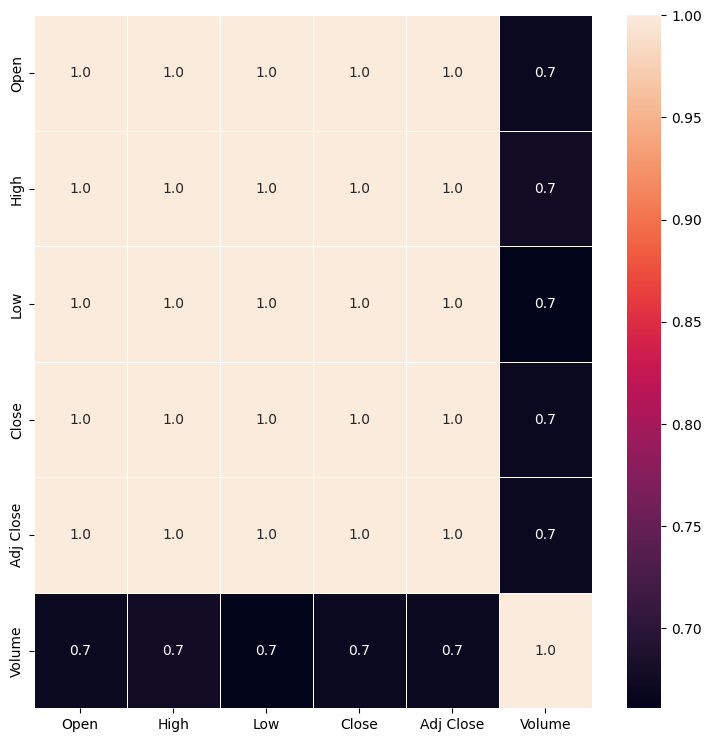

In [12]:
# We will see the correlation between each feature
import seaborn as sns # Importing the seaborn library for data visualization


f,ax = plt.subplots(figsize=(9, 9)) # Initializes a subplot with a specified size (9x9) using Matplotlib. The subplot is assigned to the variables f and ax

sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax) # Creates a heatmap of the correlation matrix of numerical features in the DataFrame (df).
plt.show()

The heatmap of the correlation matrix is a valuable tool for gaining insights into the relationships within a dataset, assisting in decision-making processes, and supporting the development of predictive models.

* Open, High, Low, Close, and Adj Close: These variables represent the opening, highest, lowest, closing, and adjusted closing prices of Bitcoin for each day. They have a perfect positive correlation of 1.0 with each other, meaning they move in the same direction and by the same amount. This makes sense because the prices of Bitcoin are determined by the market demand and supply, which are reflected in these variables.

* Volume: This variable represents the number of Bitcoins traded for each day. It has a moderate positive correlation of 0.7 with the other variables, meaning it tends to move in the same direction but not by the same amount. This indicates that there is some relationship between the trading volume and the price movements of Bitcoin, but it is not very strong or consistent. There may be other factors that affect the volume, such as news, events, or sentiment.

- [df.corr():](#)  Calculates the correlation matrix.
- [annot=True](#) Adds numeric annotations (correlation values) to each cell in the heatmap.
- [linewidths=.5](#) Sets the width of the lines between cells.
- [fmt='.1f](#) Formats the annotation to one decimal place.
- [ax=ax](#) Specifies the subplot to use for plotting.

In [13]:
# From here we want to do some visualizations, and espicially we want to see the chart of the close prices becuase we want to predict it.

In [14]:
# Filtering the DataFrame based on date range and dropping specific columns
# First we create new dataset has the data of first four columns. (Open, high, low, Close) and the Date as index

y_overall = df.loc[(df.index >= '2015-01-01') & (df.index <= '2024-01-01')] # Selecting rows within the specified date range

y_overall = y_overall.drop(y_overall[['Adj Close','Volume']],axis=1) # Drops specific columns ('Adj Close' and 'Volume') from the selected subset (y_overall). The axis=1 parameter indicates that the operation is along columns.

y_overall

# the benefits include improved focus, better data management, enhanced interpretability, and potentially more effective modeling by tailoring the analysis to a specific time range and excluding unnecessary columns.

,Open,High,Low,Close
Date,,,,
2015-01-01,320.434998,320.434998,314.002991,314.248993
2015-01-02,314.079010,315.838989,313.565002,315.032013
2015-01-03,314.846008,315.149994,281.082001,281.082001
2015-01-04,281.145996,287.230011,257.612000,264.195007
2015-01-05,265.084015,278.341003,265.084015,274.473999
...,...,...,...,...
2023-12-28,43468.199219,43804.781250,42318.550781,42627.855469
2023-12-29,42614.644531,43124.324219,41424.062500,42099.402344
2023-12-30,42091.753906,42584.125000,41556.226563,42156.902344


In [15]:
# Creating a line chart for BTC analysis using Plotly Express

# Creating an Iterator for Names:
names = cycle(['BTC Open Price','BTC Close Price','BTC High Price','BTC Low Price']) # Creates an iterator (names) that cycles through the specified names for stock parameters.

# Creating the Line Chart:
# Uses Plotly Express to create a line chart. The x-axis is based on the index of the DataFrame (y_overall.index), and the y-axis includes multiple lines for 'Open', 'Close', 'High', and 'Low' stock prices.
fig = px.line(y_overall, x=y_overall.index, y=[y_overall['Open'], y_overall['Close'], 
                                               y_overall['High'], y_overall['Low']],
                                               labels={'Date': 'Date','value':'Bitcoin Price'})

# Updating Layout Properties:
# Updates layout properties of the chart, including the title, font size, font color, and legend title.
fig.update_layout(title_text='Bitcoin analysis chart', font_size=15,
                   font_color='black',legend_title_text='Bitcoin Parameters')

# Assigning Names to Iteration:
fig.for_each_trace(lambda t:  t.update(name = next(names))) # Assigns names from the iterator to each trace (line) in the chart. This helps label each line with a specific stock parameter.

# Updating Axes Properties:
fig.update_xaxes(showgrid=False) # Updates properties of the x-axis, hiding the grid lines.
fig.update_yaxes(showgrid=False) # Updates properties of the y-axis, hiding the grid lines.

fig.show()

* Nothing is clear
* The value remains close for all the variables
* There is a huge increase in all the prices in 2018 and 2021 with 2018 peak to be lower than 2021.

In [16]:
# We will plot all the values in different graph to see better

def frequency_bitcoin_plot(df,frequency):
    

    # Initialize figure with subplots
    fig = make_subplots(
        rows=2, cols=2, subplot_titles=("Open", "High", "Low", "Close"),
        horizontal_spacing=0.15, vertical_spacing=0.2
    )

    # Add traces
    fig.add_trace(go.Scatter(x=df.index, y=df.Open,name="Open"), row=1, col=1)
    fig.add_trace(go.Scatter(x=df.index, y=df.High, name="High"), row=1, col=2)
    fig.add_trace(go.Scatter(x=df.index, y=df.Low, name="Low"), row=2, col=1)
    fig.add_trace(go.Scatter(x=df.index, y=df.Close, name="Close"), row=2, col=2)

    # Update xaxis properties
    fig.update_xaxes(title_text="TimeStamp", row=1, col=1)
    fig.update_xaxes(title_text="TimeStamp", row=1, col=2)
    fig.update_xaxes(title_text="TimeStamp", row=2, col=1)
    fig.update_xaxes(title_text="TimeStamp", row=2, col=2)

    # Update yaxis properties
    fig.update_yaxes(title_text="Open", row=1, col=1)
    fig.update_yaxes(title_text="High", row=1, col=2)
    fig.update_yaxes(title_text="Low", row=2, col=1)
    fig.update_yaxes(title_text="Close", row=2, col=2)

    # Update title and height
    fig.update_layout(title_text=f"Open High Low Close Value of Bitcoin With {frequency} Frquency", height=700)

    fig.show()

In [17]:
seaborn_plot_data_day = df_day[["Open","High","Low","Close"]]
seaborn_plot_data_month = df_month[["Open","High","Low","Close"]]
seaborn_plot_data_year = df_year[["Open","High","Low","Close"]]

In [18]:
# Daily Variation Of Bitcoin intraday price

frequency_bitcoin_plot(seaborn_plot_data_day,"day")

In [19]:
# Month Variation Of Bitcoin intraday price

frequency_bitcoin_plot(seaborn_plot_data_month,"month")

In [20]:
# Yearly Variation Of Bitcoin intraday price

frequency_bitcoin_plot(seaborn_plot_data_year,"year")

* It is the same data but see how frequency changes its variation and makes it a smoother plot for understanding.
* We can see there is a steep slope in the time series from Dec 2020 to Dec 2021
* Also there is a good price increase between 2022 and end of 2023.
* Another price increase in the series is from Dec 2016 to Dec 2018.
* Upto Dec 2016 there was no such big breakthrough in Bitcoin Domain.

In [21]:
# Lets Take all the Close Price 
closedf = df.reset_index()[['Date', 'Close']]
print("Shape of close dataframe:", closedf.shape)

Shape of close dataframe: (3288, 2)


In [22]:
closedf

,Date,Close
0,2015-01-01,314.248993
1,2015-01-02,315.032013
2,2015-01-03,281.082001
3,2015-01-04,264.195007
4,2015-01-05,274.473999
...,...,...
3283,2023-12-28,42627.855469
3284,2023-12-29,42099.402344
3285,2023-12-30,42156.902344
3286,2023-12-31,42265.187500


In [23]:
fig = px.line(closedf, x=closedf.Date, y=closedf.Close,labels={'date':'Date','close':'Close Stock'})
fig.update_traces(marker_line_width=2, opacity=0.8, marker_line_color='orange')
fig.update_layout(title_text='Whole period of timeframe of Bitcoin close price 2015-2023', plot_bgcolor='white', 
                  font_size=15, font_color='black')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

# Model

In [24]:
from sklearn.preprocessing import MinMaxScaler # for data scaling 
from sklearn.model_selection import train_test_split # for data splitting

In [41]:
btc_close = df['Close'].ffill()

In [42]:
# Normalize the 'Close' prices
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_close = scaler.fit_transform(btc_close.values.reshape(-1, 1))

In [43]:
# creating input sequences (dataX) and corresponding output values (dataY) for time series prediction.
def create_dataset(dataset, time_step=100): # The time series data, typically a NumPy array. | (default = 100): The number of time steps to be considered in each input sequence.
  dataX, dataY = [], []
    #The function iterates through the given dataset from the beginning to len(dataset) - time_step - 1.
    #For each iteration, it selects a sequence of length time_step from the dataset (along the first dimension, denoted by , 0) and appends it to dataX.
    #It also appends the value at the time step immediately following the selected sequence to dataY.
  for i in range(len(dataset)-time_step-1):
    a = dataset[i:(i+time_step), 0]
    dataX.append(a)
    dataY.append(dataset[i + time_step, 0])
  return np.array(dataX), np.array(dataY) #The function returns two NumPy arrays, np.array(dataX) containing input sequences and np.array(dataY) containing corresponding output values.

# Applying create_dataset
# The create_dataset function is applied to the normalized closing prices (scaled_close) with a specified time_step of 100.
# The resulting input sequences are stored in X, and the corresponding output values are stored in y.
time_step = 100
X, y = create_dataset(scaled_close, time_step)

***The purpose of 'create_dataset' function:*** is to prepare time series data for training a machine learning model, particularly for sequence prediction tasks like those encountered in recurrent neural networks (RNNs) or long short-term memory networks (LSTMs).

- [1- Sequence Creation:](#)
Generates input sequences (dataX) by taking a specified number of time steps (time_step) from the input time series data (dataset).

- [2- Corresponding Output Values:](#)
Creates corresponding output values (dataY) for each input sequence. These output values represent the next data point in the time series after each input sequence.

- [3- Formatting for Machine Learning:](#)
Prepares the data in a format suitable for supervised learning, where the model learns to predict an output based on a given input sequence.

- [4- NumPy Array Output:](#)
Returns NumPy arrays (np.array(dataX), np.array(dataY)) for compatibility with machine learning libraries like TensorFlow and Keras.

In [44]:
# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1) # Reshapes the input sequences (X_train and X_test) to add an additional dimension.
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1) # Reshapes the input sequences (X_train and X_test) to add an additional dimension.
# The LSTM model in Keras expects input sequences to have the shape (batch_size, time_steps, features).
# Here, the added dimension corresponds to a single feature (closing prices), making the data compatible with the LSTM model.

The code segment facilitates the preparation of data for training and testing an LSTM model. It ensures that the input sequences are properly split into training and testing sets and are appropriately shaped to meet the requirements of the LSTM architecture. 
**This is a crucial step in preparing the data for training a machine learning model for time series prediction.**

Uses the ***train_test_split*** function from scikit-learn to split the dataset into training and testing sets.
- [X](#) represents the input sequences, and [y](#) represents the corresponding output values.
- [test_size=0.2](#) specifies that 20% of the data will be used for testing, and 80% will be used for training.
- [random_state=42](#) ensures reproducibility by using a fixed random seed.

In [45]:
# defines and trains an enhanced Long Short-Term Memory (LSTM) model using the Keras library:

from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Bidirectional
from keras.optimizers import Adam

# Enhanced LSTM Model
model = Sequential() # Initializes a sequential model, allowing layers to be added sequentially.
model.add(Bidirectional(LSTM(100, return_sequences=True, input_shape=(time_step, 1)))) # Adds a bidirectional LSTM layer with 100 units, returning sequences, and input shape specified by time_step (number of time steps) and 1 feature.
model.add(Dropout(0.2)) #  Adds a dropout layer with a dropout rate of 0.2 after each LSTM layer.
# Dropout layers help prevent overfitting by randomly setting a fraction of input units to zero during training.
model.add(Bidirectional(LSTM(100, return_sequences=False))) # Adds another bidirectional LSTM layer with 100 units but this time without returning sequences.
model.add(Dropout(0.2))
model.add(Dense(50)) # Adds a dense layer with 50 units.
model.add(Dense(1)) # Adds the output layer with a single unit, as it's a regression task predicting a continuous value (closing price).

# Compile the model
# Configures the model for training.
# Uses the Adam optimizer with a learning rate of 0.001.
# Specifies mean squared error as the loss function, suitable for regression tasks.
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, batch_size=32, epochs=1, verbose=1)


2024-01-19 12:32:14.989940: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


80/80 [==============================] - 51s 410ms/step - loss: 0.0051


Model Architecture:

1- Sequential Model:
- [model = Sequential():](#) Initializes a sequential model, allowing layers to be added sequentially.

2- Bidirectional LSTM Layers:

- [Bidirectional(LSTM(100, return_sequences=True, input_shape=(time_step, 1))):](#) Adds a bidirectional LSTM layer with 100 units, returning sequences, and input shape specified by time_step (number of time steps) and 1 feature.
- [Bidirectional(LSTM(100, return_sequences=False)):](#) Adds another bidirectional LSTM layer with 100 units but this time without returning sequences.

3-Dropout Layers:
- [Dropout(0.2):](#) Adds a dropout layer with a dropout rate of 0.2 after each LSTM layer.
- Dropout layers help prevent overfitting by randomly setting a fraction of input units to zero during training.

4- Dense Layers:
- [Dense(50):](#) Adds a dense layer with 50 units.
- [Dense(1):](#) Adds the output layer with a single unit, as it's a regression task predicting a continuous value (closing price).

5- Compilation:
- [model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error'):](#) Configures the model for training.
  - Uses the Adam optimizer with a learning rate of 0.001.
  - Specifies mean squared error as the loss function, suitable for regression tasks.

6- Training:
- [model.fit(X_train, y_train, batch_size=32, epochs=1, verbose=1):](#) Trains the model on the training data.
  - X_train and y_train are the input sequences and corresponding output values.
  - batch_size=32 specifies the number of samples per gradient update.
  - epochs=1 defines the number of times the model will be trained on the entire training set.
  - verbose=1 displays training progress.

In [46]:
from keras.models import load_model
model = load_model('btc_prediction_model.h5')

This code segment visualizes the model's performance by comparing the real Bitcoin prices with the predicted prices on the testing set. It provides a clear visual representation of how well the model is able to capture the patterns in the data and make accurate predictions.

20/20 [==============================] - 6s 131ms/step


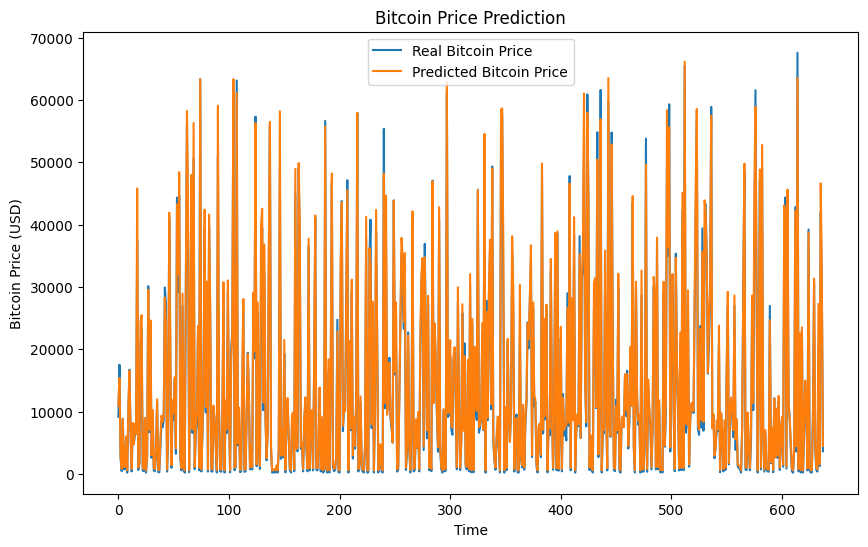

In [47]:
# This code is responsible for making predictions using the trained model and visualizing the results:
# Predict and inverse transform the scaled data
predictions = model.predict(X_test) # Uses the trained model to make predictions on the testing data (X_test), which contains input sequences not seen during training.
predictions = scaler.inverse_transform(predictions) # Inversely transforms the predicted values back to their original scale. This is necessary because the model was trained on normalized data.
y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1)) # Inversely transforms the actual test values (y_test) to their original scale.

# Plotting
plt.figure(figsize=(10,6)) # Sets the size of the figure for the plot.
plt.plot(y_test_scaled, label='Real Bitcoin Price') # Plots the actual Bitcoin prices from the test set.
plt.plot(predictions, label='Predicted Bitcoin Price') # Plots the predicted Bitcoin prices.
# plot configuration 
plt.title('Bitcoin Price Prediction')
plt.xlabel('Time')
plt.ylabel('Bitcoin Price (USD)')
plt.legend() # Displays a legend indicating which line corresponds to real prices and which corresponds to predicted prices.
plt.show()


This code segment prepares the predicted and actual values for visualization by associating them with corresponding dates in Pandas DataFrames. These DataFrames can be used for further analysis, comparison, or plotting to assess the model's performance.

In [48]:
# Assuming 'predictions' and 'y_test' are already inverse transformed to their original scale

# Get the last date from the training set as a starting point for predictions
last_train_date = btc_close.index[-1] - pd.Timedelta(days=len(y_test)) # Obtains the last date from the training set (btc_close.index[-1]) and subtracts the length of the testing set (len(y_test)) as a starting point for predictions.

# Create a date range for predictions
prediction_dates = pd.date_range(start=last_train_date, periods=len(predictions), freq='D') # Generates a date range (prediction_dates) starting from the last date of the training set and extending for the length of the predictions. The frequency is set to daily ('D').

# Create a dataframe for the predictions with corresponding dates
# Creates two Pandas DataFrames (predictions_df and actual_df) using the prediction dates as the index.

predictions_df = pd.DataFrame(data=predictions, index=prediction_dates, columns=['Predicted']) # contains the predicted values under the column name 'Predicted'.
actual_df = pd.DataFrame(data=y_test_scaled, index=prediction_dates, columns=['Actual']) # contains the actual values (scaled) under the column name 'Actual'.


This code segment visualizes the monthly average predictions and actual values for Bitcoin prices. The resampling to monthly averages provides a smoother representation of trends and facilitates a clearer comparison between predicted and actual values over time. The scatter plot allows for an assessment of how well the model's predictions align with the actual monthly trends in Bitcoin prices.

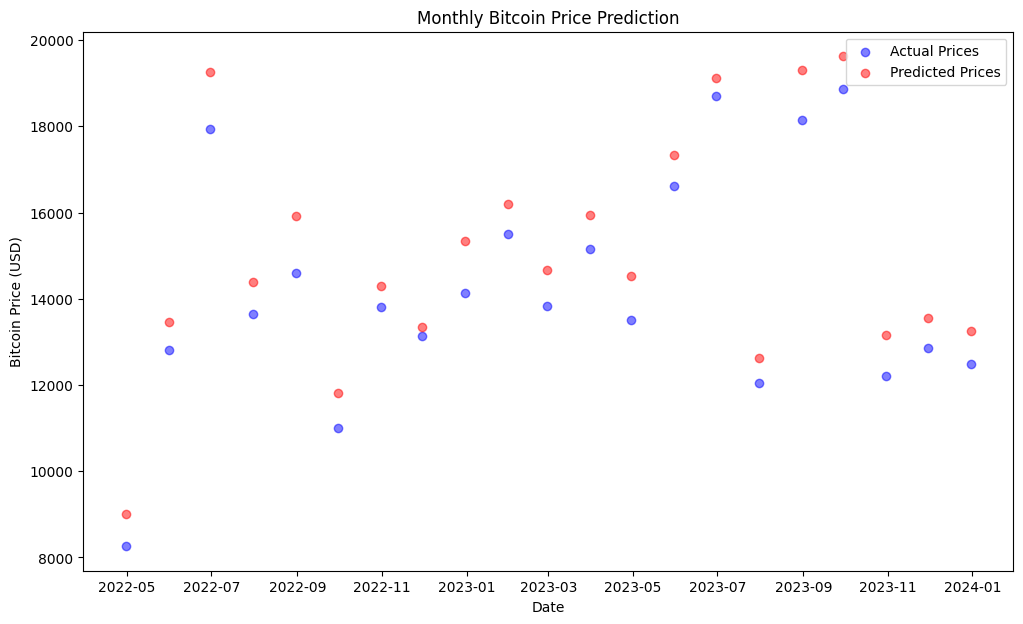

In [49]:
# Resample to monthly or yearly averages
# Resamples the predicted and actual values to monthly averages using the .resample('M').mean() method.
monthly_predictions = predictions_df['Predicted'].resample('M').mean()
monthly_actual = actual_df['Actual'].resample('M').mean()

# Plotting the aggregated data
plt.figure(figsize=(12,7)) # Creates a scatter plot with a figure size of (12, 7).
# plt.scatter() is used to plot the actual and predicted monthly average values.
plt.scatter(monthly_actual.index, monthly_actual, color='blue', label='Actual Prices', alpha=0.5) # alpha=0.5 sets the transparency of the markers for better visibility.
plt.scatter(monthly_predictions.index, monthly_predictions, color='red', label='Predicted Prices', alpha=0.5)
plt.title('Monthly Bitcoin Price Prediction')
plt.xlabel('Date')
plt.ylabel('Bitcoin Price (USD)')
plt.legend()
plt.show()

This code segment predicts the future prices of Bitcoin for a specified date range and visualizes the predicted values over time. It leverages the trained LSTM model to make

1/1 [==============================] - 0s 97ms/step


1/1 [==============================] - 0s 54ms/step


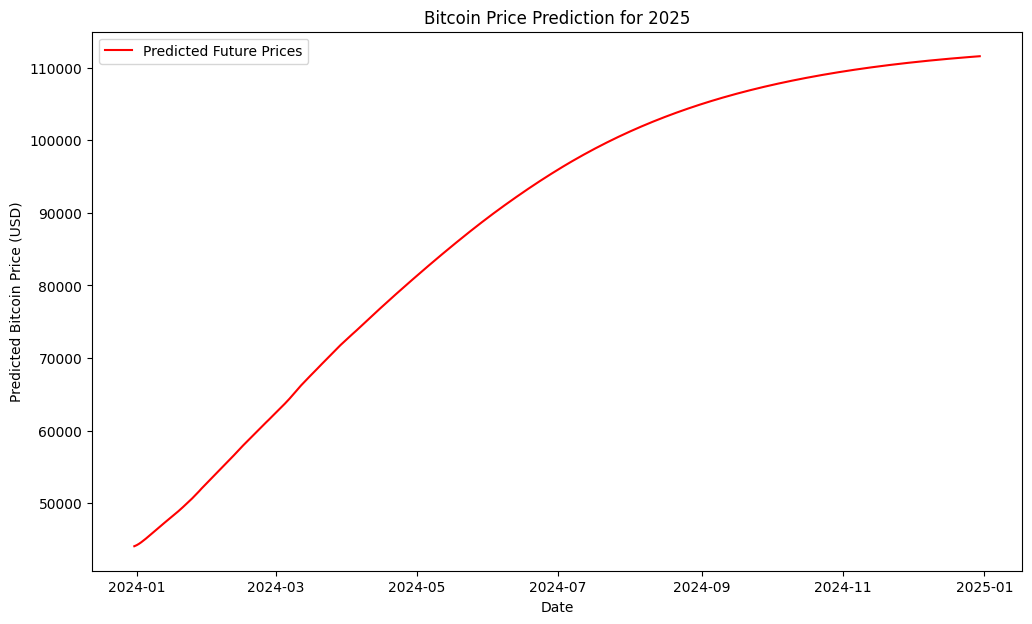

In [50]:
# Define the date range for the prediction
# Sets the start and end dates for the future prediction.
start_date = pd.to_datetime('2023-12-31')  # End of the last date with actual data
end_date = pd.to_datetime('2024-12-31')  # End of 2025

# Number of days to predict
num_days = (end_date - start_date).days # Computes the number of days between the start and end dates.

# Get the last `time_step` days from the dataset as the base for future predictions
# Takes the last time_step days from the actual data as the base for future predictions.
# Normalizes the input sequence using the same MinMaxScaler (scaler) used during training.
input_seq = btc_close[-time_step:].values.reshape(-1, 1)
input_seq = scaler.transform(input_seq)  # Assuming 'scaler' is your MinMaxScaler object



# Loop for each day in the prediction range
# Uses a loop to iteratively predict the future prices for each day.
# Reshapes the input sequence for LSTM prediction, predicts the next price, and appends it to the list of predictions.
future_predictions = [] # List to hold the predictions
for _ in range(num_days):
    # Reshape the input for LSTM prediction
    lstm_input = input_seq[-time_step:].reshape(1, time_step, 1)
    # Predict the next price
    predicted_price = model.predict(lstm_input)
    # Append the prediction to the list
    future_predictions.append(scaler.inverse_transform(predicted_price)[0, 0])
    # Update the input sequence with the predicted price
    input_seq = np.append(input_seq, predicted_price, axis=0)


# Create a date range for the prediction
# Creates a date range for the future predictions.
# Forms a Pandas DataFrame (future_predictions_df) to store the predicted prices with corresponding dates.
future_dates = pd.date_range(start=start_date, periods=num_days, freq='D')
# Create a dataframe for the predictions with corresponding dates
future_predictions_df = pd.DataFrame(data=future_predictions, index=future_dates, columns=['Predicted'])


# Plot the future predictions
plt.figure(figsize=(12, 7))
plt.plot(future_predictions_df.index, future_predictions_df['Predicted'], color='red', label='Predicted Future Prices')
plt.title('Bitcoin Price Prediction for 2025')
plt.xlabel('Date')
plt.ylabel('Predicted Bitcoin Price (USD)')
plt.legend()
plt.show()


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 59ms/step


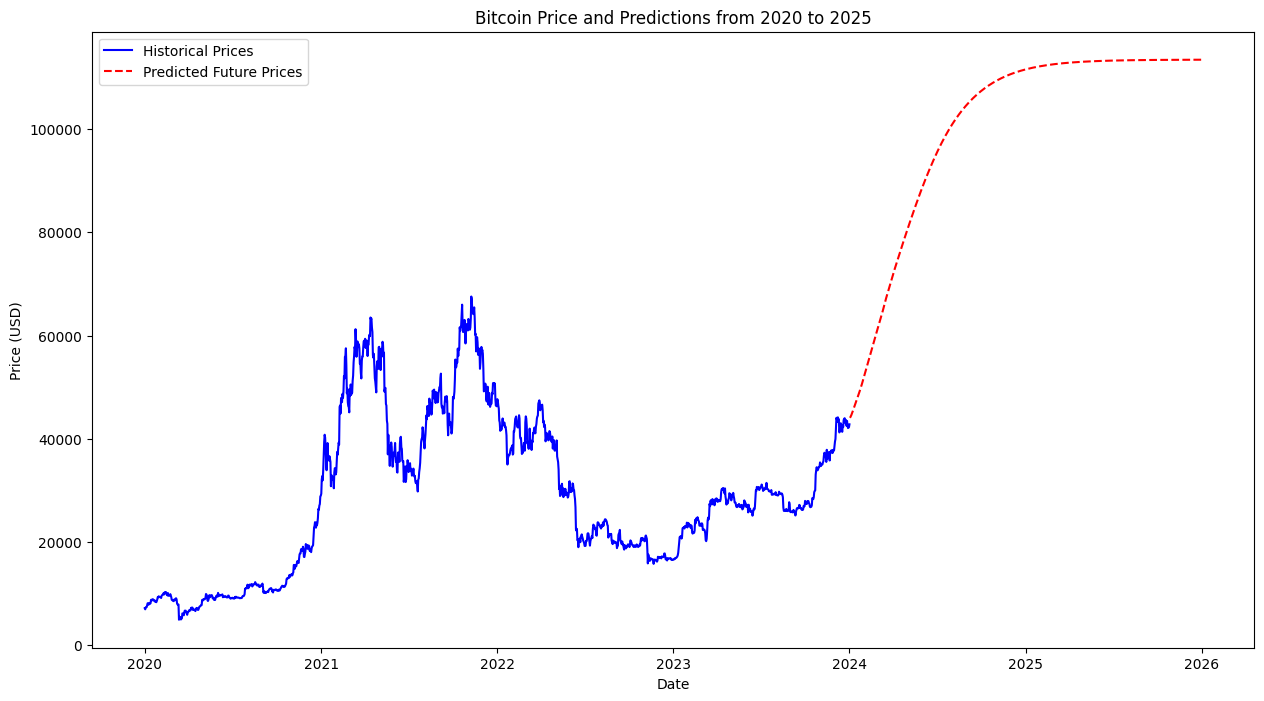

In [51]:
# Define the target year
# Specifies the target year for which predictions will be generated.
target_year = 2025

# Step 1: Extract historical data from 2020 onwards
# Filters historical Bitcoin closing prices, considering data from the year 2020 onwards.
historical_data = btc_close[btc_close.index.year >= 2020]

# Calculate the number of days to predict based on the target year
# Determines the number of days to predict based on the difference between the last historical date and the end prediction date.
last_historical_date = historical_data.index[-1]
end_prediction_date = pd.Timestamp(year=target_year, month=12, day=31)
num_days = (end_prediction_date - last_historical_date).days

# Step 2: Generate predictions for the future up to the target year

# Prepare the input sequence with the last known data points
# Prepares the input sequence with the last known data points, normalizing them using the MinMaxScaler.
input_seq = historical_data[-time_step:].values.reshape(-1, 1)
input_seq = scaler.transform(input_seq)

# Predict future prices
# Utilizes a loop to predict future Bitcoin prices using the LSTM model and appends them to the future_predictions list.
future_predictions = []
for _ in range(num_days):
    lstm_input = input_seq[-time_step:].reshape(1, time_step, 1)
    predicted_price = model.predict(lstm_input)
    future_predictions.append(scaler.inverse_transform(predicted_price)[0, 0])
    input_seq = np.append(input_seq, predicted_price, axis=0)

# Create a DataFrame for the future predictions with corresponding dates
# Generates a date range for the future predictions and creates a DataFrame (future_predictions_df) to store the predicted prices with corresponding dates.
future_dates = pd.date_range(start=last_historical_date + pd.Timedelta(days=1), periods=num_days, freq='D')
future_predictions_df = pd.DataFrame(data=future_predictions, index=future_dates, columns=['Predicted'])

# Step 3: Combine historical and predicted data into one DataFrame
# Combines the historical and predicted data into a single DataFrame (combined_data) using an outer join on the date index.
combined_data = historical_data.to_frame(name='Actual')
combined_data = combined_data.join(future_predictions_df, how='outer')

# Step 4: Plot the combined data
plt.figure(figsize=(15, 8))
plt.plot(combined_data.index, combined_data['Actual'], label='Historical Prices', color='blue')
plt.plot(combined_data.index, combined_data['Predicted'], label='Predicted Future Prices', color='red', linestyle='--')
plt.title(f'Bitcoin Price and Predictions from 2020 to {target_year}')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()


In [52]:
# model.save('enahnced_3.h5')  # This saves the model in HDF5 format

**Using the Generated Model btc_prediction_model.h5**


In [53]:
import pandas as pd

def predict_price(input_date):
    # Converts the input date to a pandas Timestamp for consistency in handling time-related data.
    input_date = pd.Timestamp(input_date)

    # Checks if the input date is outside the range covered by the historical data and future predictions. If so, it returns a message indicating that the date is out of the prediction range.
    if input_date < historical_data.index[0] or input_date > future_predictions_df.index[-1]:
        return "Date out of prediction range"

    # If the input date is within the prediction range, it checks if the date corresponds to a future prediction. If yes, it retrieves the predicted price. Otherwise, it retrieves the historical actual price for that date.
    if input_date in future_predictions_df.index:
        # Prediction for a future date
        predicted_price = future_predictions_df.loc[input_date]['Predicted']
    else:
        # Historical actual price
        predicted_price = historical_data.loc[input_date]['Actual']

    return predicted_price


In [54]:
import tkinter as tk
from datetime import datetime # Imports the datetime module for handling date and time operations.

def get_date(): # Defines a function to handle the button click event and retrieve the user-entered date.
    # Retrieve the date from the entry field
    date_string = date_entry.get()
    
    try:
        # Parse the date string into a datetime object
        entered_date = datetime.strptime(date_string, '%Y-%m-%d').date()
        # Call the prediction function | to get the predicted price for the entered date.
        predicted_price = predict_price(entered_date)
        # Clear the previous result
        result_label.config(text="")
        result_label.config(text=f"The predicted price for {entered_date} is {predicted_price}")# Display the result
        
    except ValueError:
        result_label.config(text="Please enter a valid date in YYYY-MM-DD format.")


# Set up the Tkinter window
# Sets up the main Tkinter window with a title, size, and centered position.
window = tk.Tk()
window.title("Bitcoin Price Prediction")
window.geometry("400x200")
window.eval('tk::PlaceWindow . center')# Set the window size and position it in the center of the screen

# Creates Tkinter GUI elements - a label, an entry field, a button, and a label for displaying the result.
# Packs the created GUI elements into the Tkinter window.

# Create a label, entry field, and button
label = tk.Label(window, text="Enter a date (YYYY-MM-DD):")
label.pack()

date_entry = tk.Entry(window)
date_entry.pack()

submit_button = tk.Button(window, text="Get Prediction", command=get_date)
submit_button.pack()

# Create a label to display the result
result_label = tk.Label(window, text="")
result_label.pack()

# Start the Tkinter event loop
# Initiates the Tkinter event loop, allowing the GUI to respond to user interactions.

window.mainloop()

Exception in Tkinter callback
Traceback (most recent call last):
  File "/usr/local/Cellar/python@3.11/3.11.7/Frameworks/Python.framework/Versions/3.11/lib/python3.11/tkinter/__init__.py", line 1948, in __call__
    return self.func(*args)
           ^^^^^^^^^^^^^^^^
  File "/var/folders/c8/xnw5tnl52n791pftz7ytslr40000gn/T/ipykernel_865/1524080628.py", line 12, in get_date
    predicted_price = predict_price(entered_date)
                      ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/var/folders/c8/xnw5tnl52n791pftz7ytslr40000gn/T/ipykernel_865/1984646245.py", line 17, in predict_price
    predicted_price = historical_data.loc[input_date]['Actual']
                      ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~^^^^^^^^^^
IndexError: invalid index to scalar variable.
Exception in Tkinter callback
Traceback (most recent call last):
  File "/usr/local/Cellar/python@3.11/3.11.7/Frameworks/Python.framework/Versions/3.11/lib/python3.11/tkinter/__init__.py", line 1948, in __call__
    return self.func(*arg

In [55]:
# Import necessary libraries
import numpy as np
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

# Make predictions on the test set
predictions = model.predict(X_test)

# Inverse transform the predictions and actual values
predictions = scaler.inverse_transform(predictions)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate evaluation metrics
mae = mean_absolute_error(y_test_actual, predictions)
mse = mean_squared_error(y_test_actual, predictions)
mape = mean_absolute_percentage_error(y_test_actual, predictions)

# Calculate percentage error
percentage_error = np.mean(np.abs((y_test_actual - predictions) / y_test_actual)) * 100

# Print evaluation metrics
print(f'Mean Absolute Error (MAE): {mae:.2f} USD')
print(f'Mean Squared Error (MSE): {mse:.2f} USD^2')
print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}%')
print(f'Percentage Error: {percentage_error:.2f}%')


 2/20 [==>...........................] - ETA: 2s

20/20 [==============================] - 3s 145ms/step
Mean Absolute Error (MAE): 1123.46 USD
Mean Squared Error (MSE): 3470618.38 USD^2
Mean Absolute Percentage Error (MAPE): 0.31%
Percentage Error: 31.36%


In [56]:
df = pd.read_csv('BTC-USD.csv')

df['Date'] = pd.to_datetime(df['Date'])
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month

# Assuming your DataFrame columns are 'unix', 'Date', 'symbol', 'open', 'high', 'low', 'close', 'Volume BTC', 'Volume USD', 'year', 'month'
# Let's use 'year' and 'month' as features, and 'Close' as the target
features = ['year', 'month']
target = 'Close'  # Adjusted column name to match your dataset

X = df[features]
y = df[target]

In [57]:
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Predicted Bitcoin Price for 2025-1: $43254.67


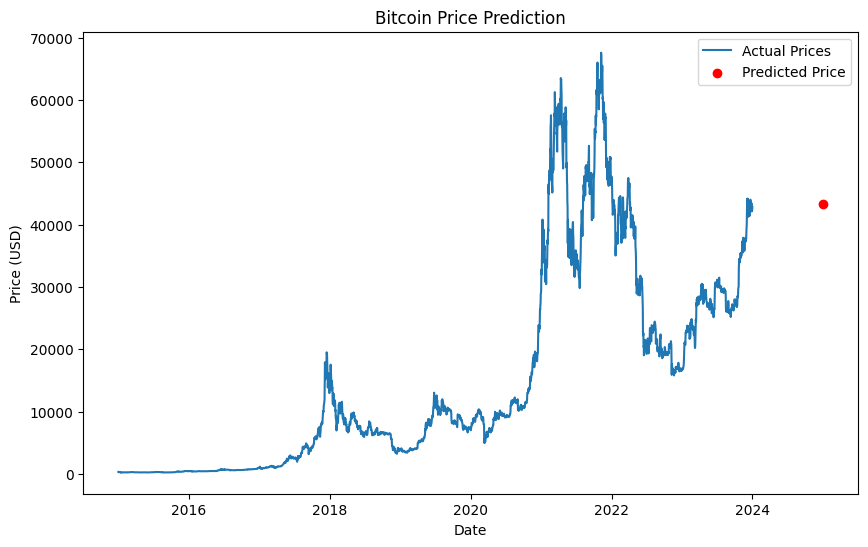

In [58]:
user_input_year = 2025
user_input_month = 1
user_input = pd.DataFrame({'year': [user_input_year], 'month': [user_input_month]})
predicted_price = model.predict(user_input)[0]

print(f'Predicted Bitcoin Price for {user_input_year}-{user_input_month}: ${predicted_price:.2f}')

# Visualize Predictions
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Close'], label='Actual Prices')  # Adjusted column name to 'Close'
plt.scatter(pd.to_datetime(f'{user_input_year}-{user_input_month}'), predicted_price, color='red', marker='o', label='Predicted Price')
plt.title('Bitcoin Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

In [59]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Predictions on the test set
y_pred = model.predict(X_test)

# Evaluation Metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Calculate Percentage Error
percentage_error = (abs(y_test - y_pred) / y_test) * 100
mean_percentage_error = percentage_error.mean()

# Print Evaluation Metrics
print(f'Mean Absolute Error (MAE): ${mae:.2f}')
print(f'Mean Squared Error (MSE): ${mse:.2f}')
print(f'R-squared (R2) Score: {r2:.4f}')
print(f'Mean Percentage Error: {mean_percentage_error:.2f}%')


Mean Absolute Error (MAE): $7129.51
Mean Squared Error (MSE): $99039798.61
R-squared (R2) Score: 0.6079
Mean Percentage Error: 312.77%
